In [0]:
from keras.applications import ResNet50
from keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
model = ResNet50(weights="imagenet")

In [93]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
tiger = plt.imread('tiger.jpg')
panda = plt.imread('panda.jpg')

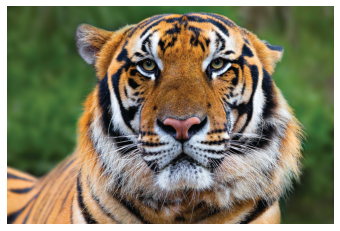

In [95]:
plt.imshow(tiger)
plt.axis("off")
plt.show()

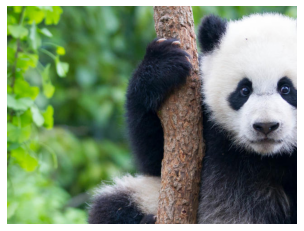

In [96]:
plt.imshow(panda)
plt.axis("off")
plt.show()

In [97]:
print(tiger.shape)
print(panda.shape)

(1024, 1536, 3)
(480, 640, 3)


In [0]:
tiger = cv2.resize(tiger,(224,224))

In [0]:
panda = cv2.resize(panda,(224,224))

In [100]:
print(tiger.shape)
print(panda.shape)

(224, 224, 3)
(224, 224, 3)


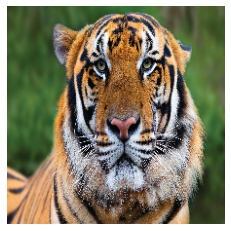

In [101]:
plt.imshow(tiger)
plt.axis("off")
plt.show()

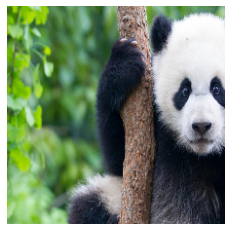

In [102]:
plt.imshow(panda)
plt.axis("off")
plt.show()

In [0]:
tiger = preprocess_input(tiger)

In [0]:
panda = preprocess_input(panda)

In [105]:
tiger = tiger.reshape(1,*tiger.shape)
panda = panda.reshape(1,*panda.shape)
print(tiger.shape)
print(panda.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [0]:
pred1 = model.predict(tiger)
pred2 = model.predict(panda)

In [107]:
print(pred1.shape) ##1000 classes
print(pred2.shape) ##1000 classes

(1, 1000)
(1, 1000)


In [109]:
decode_predictions(pred1,top=5)[0] ## model predicts 56% a tiger_cat and 43% tiger

[('n02123159', 'tiger_cat', 0.5614441),
 ('n02129604', 'tiger', 0.43662307),
 ('n02128925', 'jaguar', 0.0017100411),
 ('n02128385', 'leopard', 5.148421e-05),
 ('n02087394', 'Rhodesian_ridgeback', 3.010569e-05)]

In [110]:
decode_predictions(pred2,top=5)[0] ## model predicts 99.8225% a giant_panda

[('n02510455', 'giant_panda', 0.9982255),
 ('n02500267', 'indri', 0.0009972391),
 ('n02483362', 'gibbon', 0.0003975575),
 ('n02509815', 'lesser_panda', 0.00029845335),
 ('n02488702', 'colobus', 1.2199427e-05)]